In [ ]:
# Nama: Muhammad Randi Noor
# Kelas: Belajar Machine Learning untuk Pemula

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# set direktori

dir_path = "drive/My Drive/dicoding/submission"
train_dir = dir_path + "/data/rockpaperscissors/train"
val_dir = dir_path + "/data/rockpaperscissors/val"

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=.2,
    fill_mode='nearest'
)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300,200)
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(300,200)
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [6]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [19]:
model = tf.keras.models.Sequential([
    # tf.keras.layers.InputLayer(input_shape=(300,200,3)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(300, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [20]:
model.compile(loss='categorical_crossentropy',
            optimizer='Adam', 
            metrics=['categorical_accuracy'])

In [21]:
# Model Fitting
history = model.fit(train_generator,
          batch_size=32, epochs=10,
          validation_data=validation_generator)

Epoch 1/10
42/42 [==============================] - 34s 793ms/step - loss: 1.1254 - categorical_accuracy: 0.3265 - val_loss: 1.0982 - val_categorical_accuracy: 0.3318
Epoch 2/10
42/42 [==============================] - 33s 784ms/step - loss: 1.0139 - categorical_accuracy: 0.4581 - val_loss: 0.8512 - val_categorical_accuracy: 0.6144
Epoch 3/10
42/42 [==============================] - 33s 783ms/step - loss: 0.6439 - categorical_accuracy: 0.7397 - val_loss: 0.5619 - val_categorical_accuracy: 0.7883
Epoch 4/10
42/42 [==============================] - 33s 781ms/step - loss: 0.4682 - categorical_accuracy: 0.8212 - val_loss: 0.3829 - val_categorical_accuracy: 0.8547
Epoch 5/10
42/42 [==============================] - 33s 781ms/step - loss: 0.3245 - categorical_accuracy: 0.8775 - val_loss: 0.2705 - val_categorical_accuracy: 0.8993
Epoch 6/10
42/42 [==============================] - 33s 782ms/step - loss: 0.3721 - categorical_accuracy: 0.8691 - val_loss: 0.2986 - val_categorical_accuracy: 0.885

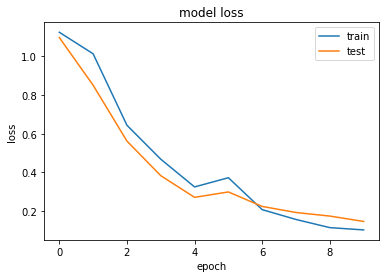

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Saving rock3.jpg to rock3.jpg
[[0. 1. 0.]]
rock


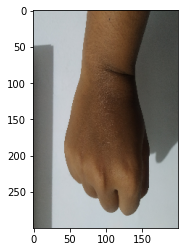

In [26]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from google.colab import files
uploaded = files.upload()

# predicting images
path = '/content/' + list(uploaded.keys())[0]
img = image.load_img(path, target_size=(300,200))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 
images = np.vstack([x])
classes = model.predict(images, batch_size=32)

print(classes)
if classes[0][0] > classes[0][1]:
  if classes[0][0] > classes[0][2]:
    print('paper')
  else:
    print('scissor')
else:
  if classes[0][1] > classes[0][2]:
    print('rock')
  else:
    print('scissor')